In [81]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [82]:

df_cancer = pd.read_csv("cancerFiltered.csv", sep=",")
df_healthy= pd.read_csv("healthyFiltered.csv", sep=",")
paired= pd.read_csv("paired_2sided.csv",sep=",")
paired

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,normality,p,stat,expression
0,0,HIST3H2A,92815.0,NOT,1.008929e-08,44.0,expressed
1,1,LIN7B,64130.0,NOT,2.384960e-01,494.0,not
2,2,LXN,56925.0,NOT,1.725267e-06,142.0,expressed
3,3,CNKSR2,22866.0,ND,1.265880e-08,48.0,expressed
4,4,SCML1,6322.0,NOT,1.601853e-02,388.0,expressed
...,...,...,...,...,...,...,...
17270,17270,ZNF521,25925.0,NaN,8.775508e-06,177.0,expressed
17271,17271,SPINT2,10653.0,NaN,4.778330e-09,31.0,expressed
17272,17272,HAVCR2,84868.0,NaN,3.366814e-09,25.0,expressed
17273,17273,CTD-2116N17.1,0.0,NaN,2.964334e-09,16.0,expressed


In [83]:
df_cancer

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,...,22.59,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05
17271,19642,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,...,18052.61,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48
17272,19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
17273,19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


In [84]:
df_healthy

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,215.77,148.09,83.45,232.94,167.90,80.01,161.02,...,145.02,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26
17271,19642,SPINT2,10653,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,...,3955.48,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55
17272,19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
17273,19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [85]:
df_cancer['average_GE']=df_cancer.iloc[:,2:].mean(axis=1)
df_healthy['average_GE']=df_healthy.iloc[:,2:].mean(axis=1)

df_cancer['average_GE']

0         2100.738627
1         1441.223725
2         1596.905686
3          462.085882
4          259.710784
             ...     
17270      587.146667
17271    13546.048627
17272     1863.656667
17273       11.337647
17274      276.543137
Name: average_GE, Length: 17275, dtype: float64

In [86]:
df_healthy['average_GE']

0        1872.515686
1        1426.018235
2        1965.525294
3         489.072549
4         287.705490
            ...     
17270     668.631176
17271    6181.318431
17272    2166.252941
17273       1.942941
17274      98.763137
Name: average_GE, Length: 17275, dtype: float64

In [87]:
FC = pd.DataFrame()
FC['Hugo_Symbol'] = df_cancer['Hugo_Symbol']
FC['Entrez_Gene_Id'] = df_cancer['Entrez_Gene_Id']
FC

,Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
1,LIN7B,64130
2,LXN,56925
3,CNKSR2,22866
4,SCML1,6322
...,...,...
17270,ZNF521,25925
17271,SPINT2,10653
17272,HAVCR2,84868
17273,CTD-2116N17.1,0


In [88]:
FC['FC']=df_cancer['average_GE']/df_healthy['average_GE']
FC

,Hugo_Symbol,Entrez_Gene_Id,FC
0,HIST3H2A,92815,1.121880
1,LIN7B,64130,1.010663
2,LXN,56925,0.812457
3,CNKSR2,22866,0.944821
4,SCML1,6322,0.902697
...,...,...,...
17270,ZNF521,25925,0.878132
17271,SPINT2,10653,2.191450
17272,HAVCR2,84868,0.860314
17273,CTD-2116N17.1,0,5.835301


In [89]:
FC['log2FC']=np.log2(FC['FC'])
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC
0,HIST3H2A,92815,1.121880,0.165919
1,LIN7B,64130,1.010663,0.015302
2,LXN,56925,0.812457,-0.299636
3,CNKSR2,22866,0.944821,-0.081887
4,SCML1,6322,0.902697,-0.147687
...,...,...,...,...
17270,ZNF521,25925,0.878132,-0.187490
17271,SPINT2,10653,2.191450,1.131886
17272,HAVCR2,84868,0.860314,-0.217066
17273,CTD-2116N17.1,0,5.835301,2.544807


In [90]:
FC['ABS']=FC['log2FC'].abs()
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS
0,HIST3H2A,92815,1.121880,0.165919,0.165919
1,LIN7B,64130,1.010663,0.015302,0.015302
2,LXN,56925,0.812457,-0.299636,0.299636
3,CNKSR2,22866,0.944821,-0.081887,0.081887
4,SCML1,6322,0.902697,-0.147687,0.147687
...,...,...,...,...,...
17270,ZNF521,25925,0.878132,-0.187490,0.187490
17271,SPINT2,10653,2.191450,1.131886,1.131886
17272,HAVCR2,84868,0.860314,-0.217066,0.217066
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807


In [104]:
Threshold=math.log(1.5,2)
Threshold

0.5849625007211562

In [92]:
FC.loc[FC['ABS'] < Threshold, 'over expressed'] = 0 
FC.loc[FC['ABS'] >= Threshold, 'over expressed'] = 1
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,over expressed
0,HIST3H2A,92815,1.121880,0.165919,0.165919,0.0
1,LIN7B,64130,1.010663,0.015302,0.015302,0.0
2,LXN,56925,0.812457,-0.299636,0.299636,0.0
3,CNKSR2,22866,0.944821,-0.081887,0.081887,0.0
4,SCML1,6322,0.902697,-0.147687,0.147687,0.0
...,...,...,...,...,...,...
17270,ZNF521,25925,0.878132,-0.187490,0.187490,0.0
17271,SPINT2,10653,2.191450,1.131886,1.131886,1.0
17272,HAVCR2,84868,0.860314,-0.217066,0.217066,0.0
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0


In [93]:
FC['over expressed'].sum()

3444.0

In [94]:
cc=['r']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='g'
    elif val>=0:
        cc[n]='b'

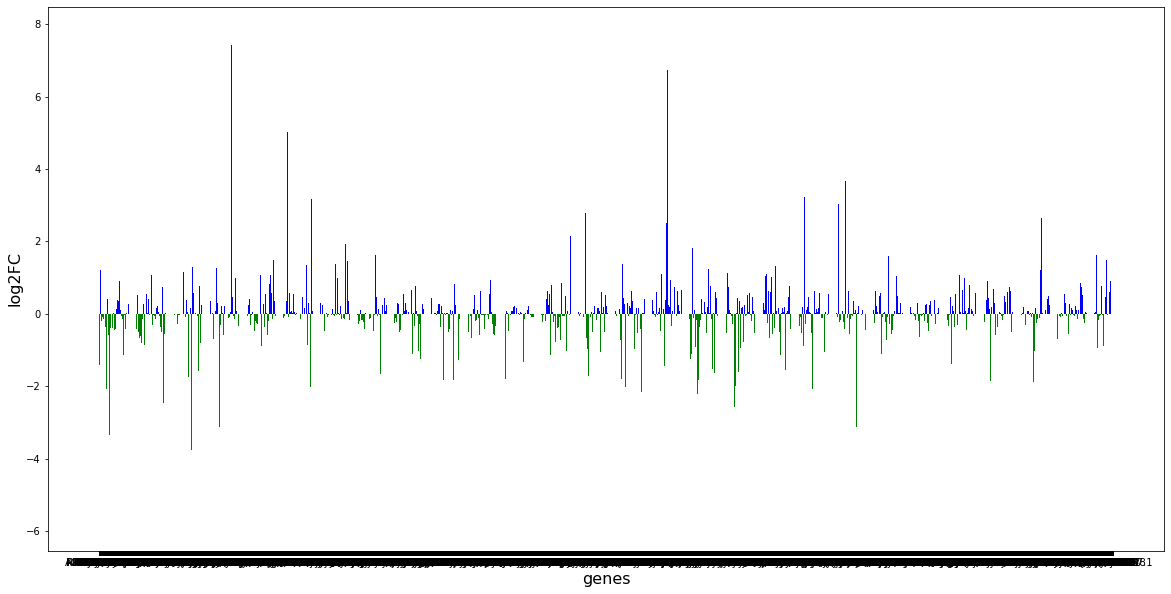

In [95]:
plt.figure(figsize=(20,10))
plt.bar(FC["Hugo_Symbol"],FC['log2FC'],color=cc)
plt.xlabel('genes', fontsize=16)
plt.ylabel('log2FC', fontsize=16)
plt.show()

In [96]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'

In [97]:
paired['p'].max()

1.0

In [98]:
FC['segnificance']=-np.log10(paired['p'])

In [99]:
FC['segnificance']

0        7.996139
1        0.622519
2        5.763144
3        7.897608
4        1.795377
           ...   
17270    5.056728
17271    8.320724
17272    8.472781
17273    8.528073
17274    7.272511
Name: segnificance, Length: 17275, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

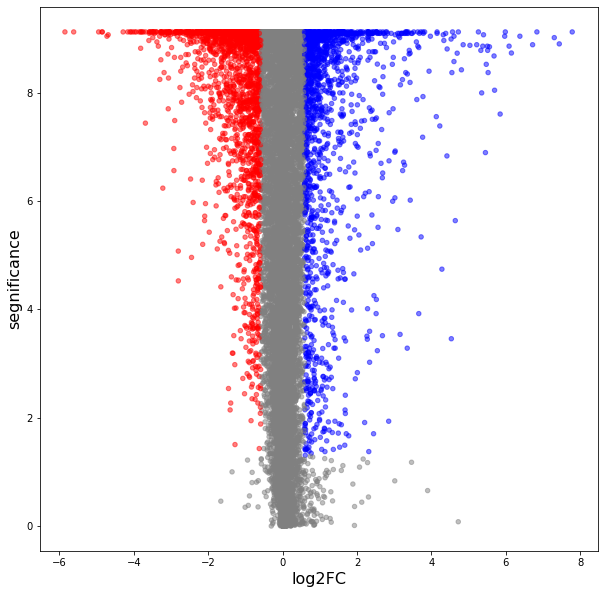

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [114]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'

for n,val in enumerate(FC['over expressed']):
    if val==0:
        cc[n]='gray'
    

<function matplotlib.pyplot.show(close=None, block=None)>

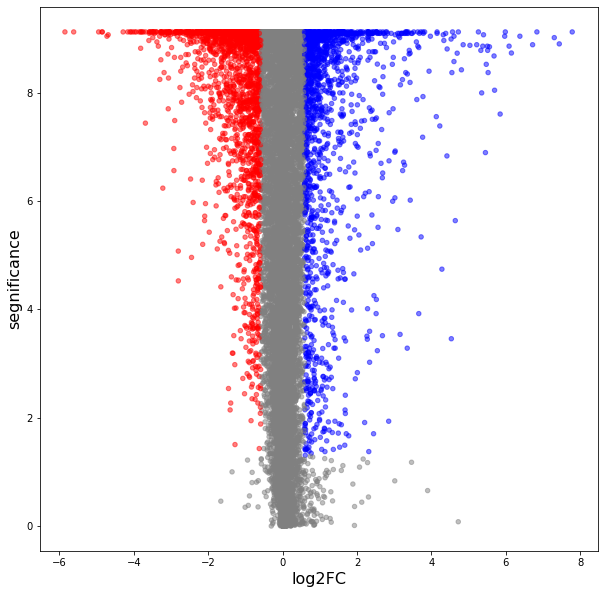

In [119]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [112]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'
for n,val in enumerate(FC['segnificance']):
    if val<-math.log(5/100,10):
        cc[n]='gray'
    

<function matplotlib.pyplot.show(close=None, block=None)>

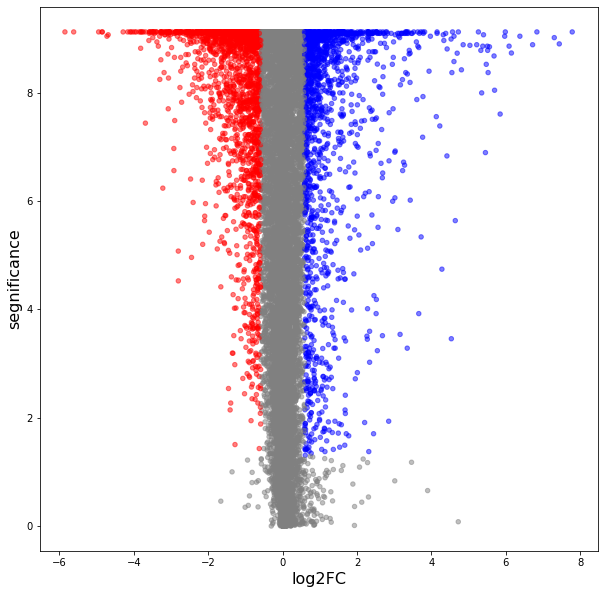

In [120]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [116]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'
for n,val in enumerate(FC['segnificance']):
    if val<-math.log(5/100,10):
        cc[n]='gray'
for n,val in enumerate(FC['over expressed']):
    if val==0:
        cc[n]='gray'

<function matplotlib.pyplot.show(close=None, block=None)>

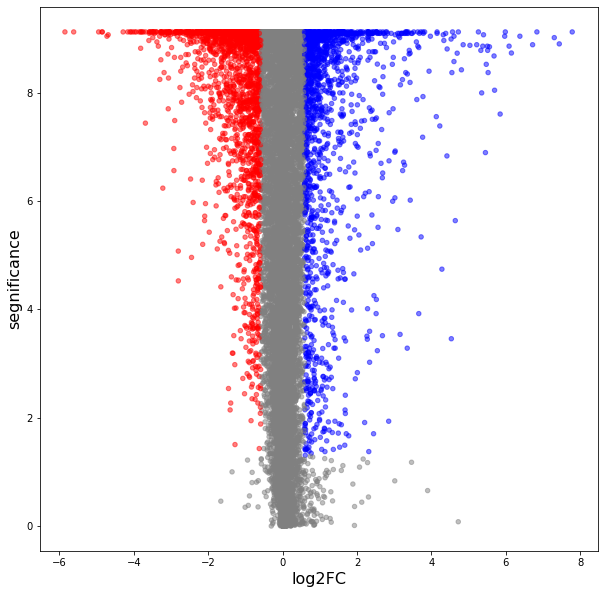

In [121]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show